<a href="https://colab.research.google.com/github/AKHIL-882/Youtube-Adview-Prediction/blob/main/Youtube_Adview_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Youtube advertisers pay content creators based on adviews and clicks for the goods and services being marketed. They want to estimate the adview based on other metrics like comments, likes etc. The problem statement is therefore to train various regression models and choose the best one to predict the number of adviews. The data needs to be refined and cleaned before feeding in the algorithms for better results**

**What Is Exploratory Data Analysis ?**
Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visual!)y. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights

**How to perform Exploratory Data Analysis ?**
Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA whereas in this notebook you can understand some common methods and plots that would be used In the EDA process.

**What data are we exploring today?**
The data-set can be downloaded from here. To give a piece of brief information about the data set this data contains of
15000 rows and 9 columns which contains features of the can such as vidid, adview, views, likes, dislikes , comment, published and duration. So in this notebook we will explore the data and make it ready for modeling.

**1.1 Importing the Required Libraries**

In [4]:

import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns

**1.2 Mount the google drive**

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**1.3 Reading the datasets**

In [6]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Youtube Adview/train.csv')

**Printing the first 10 rows of the dataset**



In [7]:
dataset.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


**1.4 Entire information of Youtube Adviews dataset**

In [8]:
print("-------------------------------------------------------\nChecking Null values\n-------------------------------------------------------")
print(" " ,dataset.isnull().sum())
print("-------------------------------------------------------\nShape of the dataset\n-------------------------------------------------------")
print(" ",dataset.shape)
print("-------------------------------------------------------\nInformation of dataset\n-------------------------------------------------------")
print("", dataset.info())
print("-------------------------------------------------------\nDescription of the dataset\n-------------------------------------------------------")
print("",dataset.describe())
print("-------------------------------------------------------\nChecking duplication records\n-------------------------------------------------------")
print(sum(dataset.duplicated()))
print("-------------------------------------------------------\nDroping the NaN values\n-------------------------------------------------------")

print(dataset.dropna(axis='columns'))
print(dataset.dropna(how='all'))
print("-------------------------------------------------------\nChecking for Null\n-------------------------------------------------------")
print(dataset.isnull().sum())
print("-------------------------------------------------------\nChecking for Unique values\n-------------------------------------------------------")
print(dataset.nunique())


-------------------------------------------------------
Checking Null values
-------------------------------------------------------
  vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64
-------------------------------------------------------
Shape of the dataset
-------------------------------------------------------
  (14999, 9)
-------------------------------------------------------
Information of dataset
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  

**Observation**: There are no null and duplicate values. Dataset is in the shape of (14999, 9) - where 14999 rows and 9 columns. You can observe that all the columns are Object datatype expect adview.

**1.5 Converting all the columsn into integer types**

In [9]:
dataset.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

**1.6 Changing the Category Attribute to integers**

In [10]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dataset["category"]=dataset["category"].map(category)
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


**1.7 Removing the character 'F' from each column**

After analysing the dataset, I came across the character 'F' which is present in each column of the dataset.

Now we have to remove the 'F' included row to get the better results

**Removing the special character from Dataset**

In [11]:
dataset=dataset[dataset.views!='F']
dataset=dataset[dataset.likes!='F']
dataset=dataset[dataset.dislikes!='F']
dataset=dataset[dataset.comment!='F']
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


**1.8 Information of dataset**

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  object
 3   likes      14637 non-null  object
 4   dislikes   14637 non-null  object
 5   comment    14637 non-null  object
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


**Observation:** We can find that except adview and category all the attributes are of object datatype. Now we have to convert the object datatypes to integer datatypes.

**1.9 Converting the columns into neumerical attributes**

In [13]:
dataset["views"] = pd.to_numeric(dataset["views"])
dataset["comment"] = pd.to_numeric(dataset["comment"])
dataset["likes"] = pd.to_numeric(dataset["likes"])
dataset["dislikes"] = pd.to_numeric(dataset["dislikes"])
dataset["adview"]=pd.to_numeric(dataset["adview"])

**2.0 LabelEncoding for categorical attributes**

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

**Importing the LabelEncoder**

In [14]:
from sklearn.preprocessing import LabelEncoder

**Insight**: From the information of the dataset, we can find that vidid, duration, published attributes are categorical variables. So now I will use label encoding method to assign the numerical values

**2.1 Applying Label Encoding on attributes**

In [15]:
dataset['duration']=LabelEncoder().fit_transform(dataset['duration'])
dataset['vidid']=LabelEncoder().fit_transform(dataset['vidid'])
dataset['published']=LabelEncoder().fit_transform(dataset['published'])
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


**Observation**: All the category attributes are now changed to numerical columns using LabelEncoding

**2.2 Finding the views between likes**

In [16]:
views = dataset['views']
likes = dataset['likes']
correlation = views.corr(likes)
correlation

0.7267160073913151

**2.3 Finding Correlation by Pearson methon**

In [17]:
corr = dataset.corr(method = 'pearson')
corr

,vidid,adview,views,likes,dislikes,comment,published,duration,category
vidid,1.000000,-0.014456,-0.047528,-0.128769,-0.076344,-0.081038,-0.144433,-0.019800,-0.038885
adview,-0.014456,1.000000,0.032807,0.044650,0.036609,0.016104,0.039276,0.012616,0.008065
views,-0.047528,0.032807,1.000000,0.726716,0.730320,0.410662,0.020330,0.033301,0.033055
likes,-0.128769,0.044650,0.726716,1.000000,0.648876,0.651202,0.097183,0.082110,-0.008875
dislikes,-0.076344,0.036609,0.730320,0.648876,1.000000,0.532548,0.044100,0.023739,0.011759
comment,-0.081038,0.016104,0.410662,0.651202,0.532548,1.000000,0.114334,0.055525,-0.034003
published,-0.144433,0.039276,0.020330,0.097183,0.044100,0.114334,1.000000,0.004417,-0.056659
duration,-0.019800,0.012616,0.033301,0.082110,0.023739,0.055525,0.004417,1.000000,0.073907
category,-0.038885,0.008065,0.033055,-0.008875,0.011759,-0.034003,-0.056659,0.073907,1.000000


**Observation:** Except vidid and category all the columns have good correlation

**2.4 Finding count of each column**

In [18]:
l = ["vidid","likes","dislikes"]
for col in l:
    print("***"*40)
    print(col)
    print(dataset[col].value_counts())
    print("***"* 40)
    print("\n")

************************************************************************************************************************
vidid
2047     1
4759     1
661      1
2708     1
12947    1
        ..
11583    1
9534     1
13628    1
3387     1
0        1
Name: vidid, Length: 14637, dtype: int64
************************************************************************************************************************


************************************************************************************************************************
likes
1        173
0        168
2        129
3        117
7        103
        ... 
14721      1
11174      1
13221      1
931        1
2053       1
Name: likes, Length: 4762, dtype: int64
************************************************************************************************************************


************************************************************************************************************************
dislikes
0       1089
1        628

**2.5 Visualizing the Categorical Attributes**

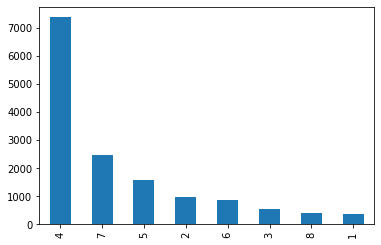

In [19]:
dataset['category'].value_counts().plot(kind = 'bar')

**Observation**: From the above graph we can observe that the category - 4(D) has more number of vidoes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


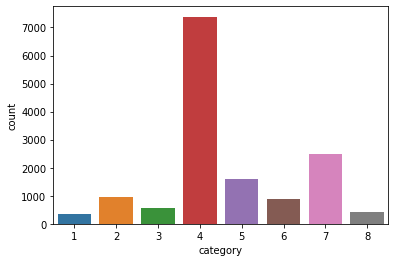

In [20]:
sns.countplot(dataset['category'])

**2.6 Considering outliners for adviews**

In [21]:
dataset = dataset[dataset["adview"]<2000000]
dataset.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


**Observation**: All the outliners from the dataset have been removed

**2.7 Visualization of adview attribute**

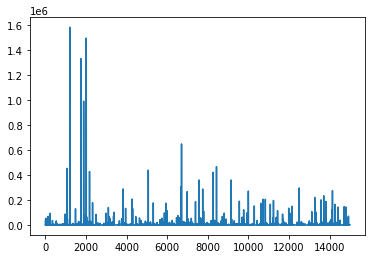

In [22]:
plt.plot(dataset["adview"])
plt.show()

**2.8 Univariate analysis**

**univariate analysis on likes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


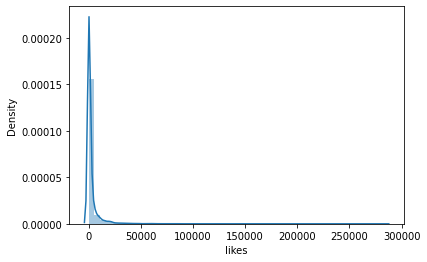

In [23]:
sns.distplot(dataset.likes)

**univariate analysis on dislikes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


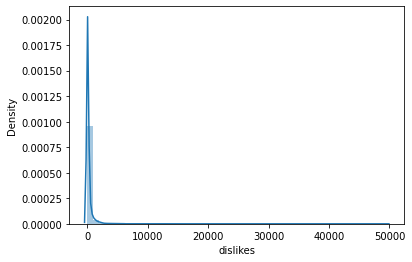

In [24]:
#univariate analysis on comments
sns.distplot(dataset.dislikes)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


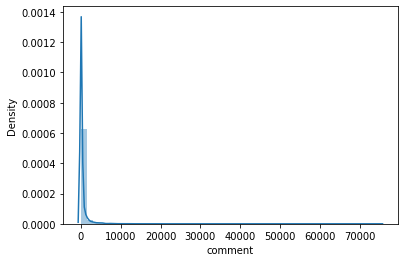

In [25]:
#univariate analysis on comments
sns.distplot(dataset.comment)

**2.9 Multivariate analysis**

Text(0, 0.5, 'Adview')

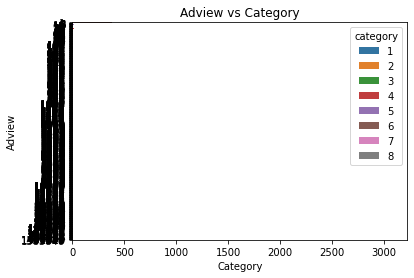

In [26]:
sns.countplot(y = 'adview', data = dataset, hue = 'category')
plt.title('Adview vs Category')
plt.xlabel('Category')
plt.ylabel('Adview')

In [ ]:
sns.countplot(x='likes',data = dataset, hue='dislikes',)

In [ ]:
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(dataset.corr(),cmap='plasma',annot=True)

In [ ]:
sns.pairplot(dataset)

**3.0 Transformations of feature variables**

**3.1 Collecting data into x and y variables**

In [27]:
traingin_data = pd.DataFrame(data = dataset.iloc[:, 1].values, columns = ['target'])
dataset=dataset.drop(["adview"],axis=1)
dataset=dataset.drop(["vidid"],axis=1)
dataset.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,2925,6
1,1707,56,2,6,2185,3040,4
2,2023,25,0,2,2094,1863,3
3,620860,777,161,153,2119,2546,8
4,666,1,0,0,2091,1963,4


**3.2 Importing the StandardScaler and Train_test_split**

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(dataset,traingin_data,test_size = 0.3, random_state = 1)


**3.3 Normalizing the dataset**

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train.mean()

0.2567859914506345

**Observation**: The mean of x train is : 0.256

**3.3 Function for calling MAE,MSE,RMSE**

In [30]:
from sklearn import metrics
def mae_mse_rmse(x_test, y_test, model_name):
  prediction = model_name.predict(x_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

**3.4 Building the Model - Linear Regression**

In [31]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
mae_mse_rmse(x_test,y_test, linear_regression)

Mean Absolute Error: 3716.61118223711
Mean Squared Error: 1334278959.015215
Root Mean Squared Error: 36527.78338491421


In [32]:
y_pred = linear_regression.predict(x_test)

In [33]:
print("R2 score:",metrics.r2_score(y_test,y_pred))

R2 score: 0.0031573038365118045


**3.5 Building the Model - Support Vector Regressor**

In [34]:
from sklearn.svm import SVR
support_vector_regressor = SVR()
support_vector_regressor.fit(x_train,y_train)
mae_mse_rmse(x_test,y_test, linear_regression)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3716.61118223711
Mean Squared Error: 1334278959.015215
Root Mean Squared Error: 36527.78338491421


In [35]:
y_pred = support_vector_regressor.predict(x_test)

In [36]:
print("R2 score:",metrics.r2_score(y_test,y_pred))

R2 score: -0.0031371145813905432


**3.6 Building the Model - Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
mae_mse_rmse(x_test,y_test, decision_tree)

Mean Absolute Error: 3575.9337280801637
Mean Squared Error: 2037781938.2607605
Root Mean Squared Error: 45141.79812835063


In [38]:
y_pred = decision_tree.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))

R2 score: -0.5224312935492763


**3.7 Building the Model - Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train,y_train)
mae_mse_rmse(x_test,y_test, random_forest_classifier)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean Absolute Error: 1992.4067410612618
Mean Squared Error: 1332645498.2395809
Root Mean Squared Error: 36505.41738207606


In [40]:
y_pred = random_forest_classifier.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))

R2 score: 0.004377665914965134


**3.8 Building the Model - Neural network**

**Importing the libraries**

In [41]:
import keras
from keras.layers import Dense

**Building Neural Network**

In [42]:
neural_network = keras.models.Sequential([Dense(6, activation="relu",input_shape=x_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
neural_network.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
neural_network_model=neural_network.fit(x_train,y_train,epochs=20)
neural_network.summary()

Epoch 1/20
321/321 [==============================] - 15s 1ms/step - loss: 407880580.4332 - mean_squared_error: 407880580.4332
Epoch 2/20
321/321 [==============================] - 0s 1ms/step - loss: 762144141.7640 - mean_squared_error: 762144141.7640
Epoch 3/20
321/321 [==============================] - 0s 1ms/step - loss: 510903892.6957 - mean_squared_error: 510903892.6957
Epoch 4/20
321/321 [==============================] - 0s 1ms/step - loss: 345590003.2587 - mean_squared_error: 345590003.2587
Epoch 5/20
321/321 [==============================] - 0s 1ms/step - loss: 498190664.3130 - mean_squared_error: 498190664.3130
Epoch 6/20
321/321 [==============================] - 0s 1ms/step - loss: 593847877.6898 - mean_squared_error: 593847877.6898
Epoch 7/20
321/321 [==============================] - 0s 1ms/step - loss: 297532651.0194 - mean_squared_error: 297532651.0194
Epoch 8/20
321/321 [==============================] - 0s 1ms/step - loss: 565947873.6801 - mean_squared_error: 565947

**Calculating the Errors**

In [43]:
mae_mse_rmse(x_test,y_test, neural_network)

y_pred = neural_network.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2768.837909841831
Mean Squared Error: 1339617900.6708817
Root Mean Squared Error: 36600.7909842244
R2 score: -0.0008314310219188492


**3.9 Saving SK models and Neural network model**

In [45]:
import joblib
joblib.dump(random_forest_classifier, "random_forest_classifier.pkl")
neural_network.save("random_forest_classifier.h5")

**Observation**: Pickle and h5 files have been created

**4.0  Analysing the Testing  dataset**

In [49]:
dataset_testing = pd.read_csv("/content/gdrive/MyDrive/Youtube Adview/test.csv")

**Displaying the first 5 rows of the dataset**

In [50]:
dataset_testing.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


**4.1 Getting the classifier h5 file**

In [51]:

from keras.models import load_model
model = load_model("/content/random_forest_classifier.h5")

**4.2 Removing the special character from Dataset**

In [52]:
dataset_testing=dataset_testing[dataset_testing.views!='F']
dataset_testing=dataset_testing[dataset_testing.likes!='F']
dataset_testing=dataset_testing[dataset_testing.dislikes!='F']
dataset_testing=dataset_testing[dataset_testing.comment!='F']
dataset_testing.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


**4.3 Changing the category variable to integers**

In [54]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dataset_testing["category"]=dataset_testing["category"].map(category)
dataset_testing.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


**4.4 Converting the attributes into neumirical attributes**

In [58]:
dataset_testing["views"] = pd.to_numeric(dataset_testing["views"])
dataset_testing["comment"] = pd.to_numeric(dataset_testing["comment"])
dataset_testing["likes"] = pd.to_numeric(dataset_testing["likes"])
dataset_testing["dislikes"] = pd.to_numeric(dataset_testing["dislikes"])
dataset_vidid = dataset_testing['vidid']


**4.5 Encoding the features - Label Encoding**

In [60]:
from sklearn.preprocessing import LabelEncoder
dataset_testing['duration']=LabelEncoder().fit_transform(dataset_testing['duration'])
dataset_testing['vidid']=LabelEncoder().fit_transform(dataset_testing['vidid'])
dataset_testing['published']=LabelEncoder().fit_transform(dataset_testing['published'])
dataset_testing.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


**4.6 Droping Vivid column**

In [62]:

dataset_testing=dataset_testing.drop(["vidid"],axis=1)
dataset_testing.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,2115,2
1,1040132,8171,340,1047,1825,2055,6
2,28534,31,11,1,1009,1506,4
3,1316715,2284,250,274,116,2265,7
4,1893173,2519,225,116,1892,1625,2


**4.7 Importing the MinMax Scaler**

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_test = dataset_testing
x_test=scaler.fit_transform(x_test)

**4.8 Predicting the model**

In [64]:
prediction = model.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


**4.9 Predicted Column**

In [65]:
prediction = prediction.rename(columns={0: "Adview"})
prediction.head()

,Adview
0,920.265442
1,1021.246033
2,754.825806
3,803.489258
4,839.747192


**5.0 Saving to Prediction.csv file**

In [66]:
prediction.to_csv('predictions.csv')